In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np




In [3]:
#read data
cars=pd.read_csv('/content/Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [6]:
#scatter matrix, corelation matrix
#pairplot

In [7]:
#check for missin g  values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

Correlation matrix:
check foe assumption:independent variables are independent of each other

In [8]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


scatter plot between variables along with histogram


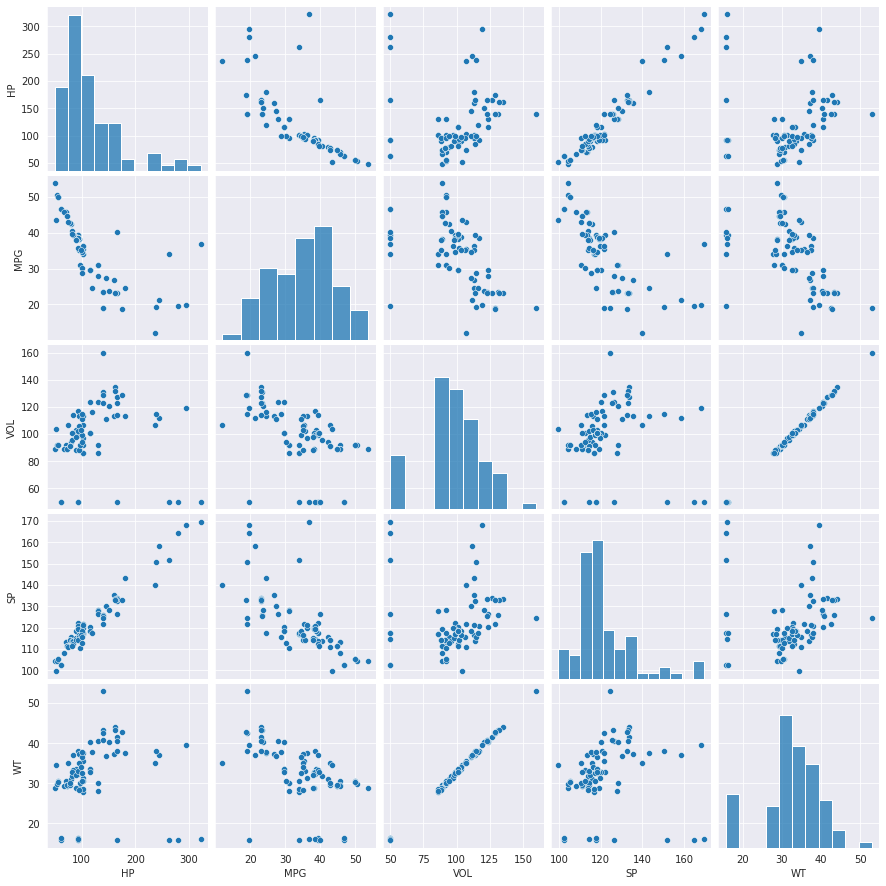

In [9]:
#format the plot background & scatter plots for all variables  
sns.set_style(style='darkgrid')
sns.pairplot(cars)

preparing model

In [10]:
#bulid model
import statsmodels.formula.api as smf
model=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()  # excess variables can joint by +

In [12]:
#coefficients beta values
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [14]:
#t & p values:print(model.tvalues,model.pvalues)
print('t values','\n',model.tvalues,'\n''p values',model.pvalues)
#p values of SP and HP only are significant. VOL and WT not significant

t values 
 Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
p values Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [13]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

Simple Linear Regression Model

In [24]:
m1_v=smf.ols('MPG~VOL',data=cars).fit() #simple regression model MPG Vs VOL
#t & p values
print('t values','\n',m1_v.tvalues,'\n''p values',m1_v.pvalues)
 

t values 
 Intercept    14.106056
VOL          -5.541400
dtype: float64 
p values Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [16]:
m1_w=smf.ols('MPG~WT',data=cars).fit()#simple regression model MPG Vs WT 
#t & p values
print('t values','\n',m1_w.tvalues,'\n''p values',m1_w.pvalues)
 # here also p value is less than alpha so WT variable is significant

t values 
 Intercept    14.248923
WT           -5.508067
dtype: float64 
p values Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [27]:
m1_wv=smf.ols('MPG~WT+VOL',data=cars).fit()#simple regression model MPG Vs VOL+WT
#t & p values
print('t values','\n',m1_wv.tvalues,'\n''p values',m1_wv.pvalues)   
# here also p value is greater than alpha so combination of both is not significant. This is problem of multicollinearity

t values 
 Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
p values Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


Calculating VIF


In [28]:
rsq_hp=smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared # build regression model considering HP as y variable
vif_hp=1/(1-rsq_hp)

In [29]:
rsq_wt=smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared # build regression model considering WT as y variable
vif_wt=1/(1-rsq_wt)

In [30]:
rsq_vol=smf.ols('VOL~WT+HP+SP',data=cars).fit().rsquared # build regression model considering VOL as y variable
vif_vol=1/(1-rsq_vol)

In [32]:
rsq_sp=smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  # build regression model considering SP as y variable
vif_sp=1/(1-rsq_sp)

In [33]:
#storing vif values in dataframe
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


SUBSET SELECTION

AIC

In [36]:
#build model with Wt
import statsmodels.formula.api as smf
model=smf.ols('MPG~WT+HP+SP',data=cars).fit()
#f'AIC:{model.aic}, rsq_wt:{rsq_wt}'
print(model.aic,rsq_wt)

476.29927501529767 0.9984363610296332


In [38]:
#build model with VOL
import statsmodels.formula.api as smf
model=smf.ols('MPG~VOL+HP+SP',data=cars).fit()
#f'AIC:{model.aic}, rsq_wt:{rsq_vol}'
print(model.aic,rsq_vol)

475.9875158854609 0.9984345797174133


Residual Analysis:-
Test for Normality of Residuals (Q-Q plot)

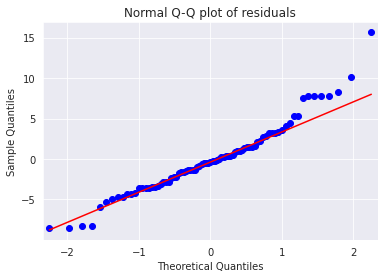

In [43]:
import statsmodels.api as sm
model = smf.ols('MPG~VOL+SP+HP',data=cars).fit() #model.resid is error
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals") # points that are away from line are outliers
plt.show() # Here some values are more than 10 y value

In [44]:
# to print index of values whose y value is more than 10
list(np.where(model.resid>10))

[array([ 0, 76])]

Residual Plot for Homoscedasticity:constant variance

In [46]:
# Function definition for standardization i.e. z score, Function name: get_standardized_values
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std() # Thsi is z score = (Xi - mean)/std. dev.

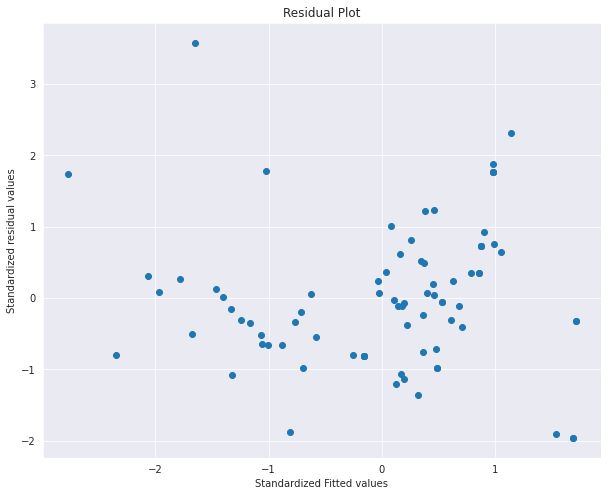

In [47]:
plt.figure(figsize=(10,8))
plt.scatter(get_standardized_values(model.fittedvalues), # fittedvalue is y hat.,model.resid is error
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

REsidual Vs Regressors

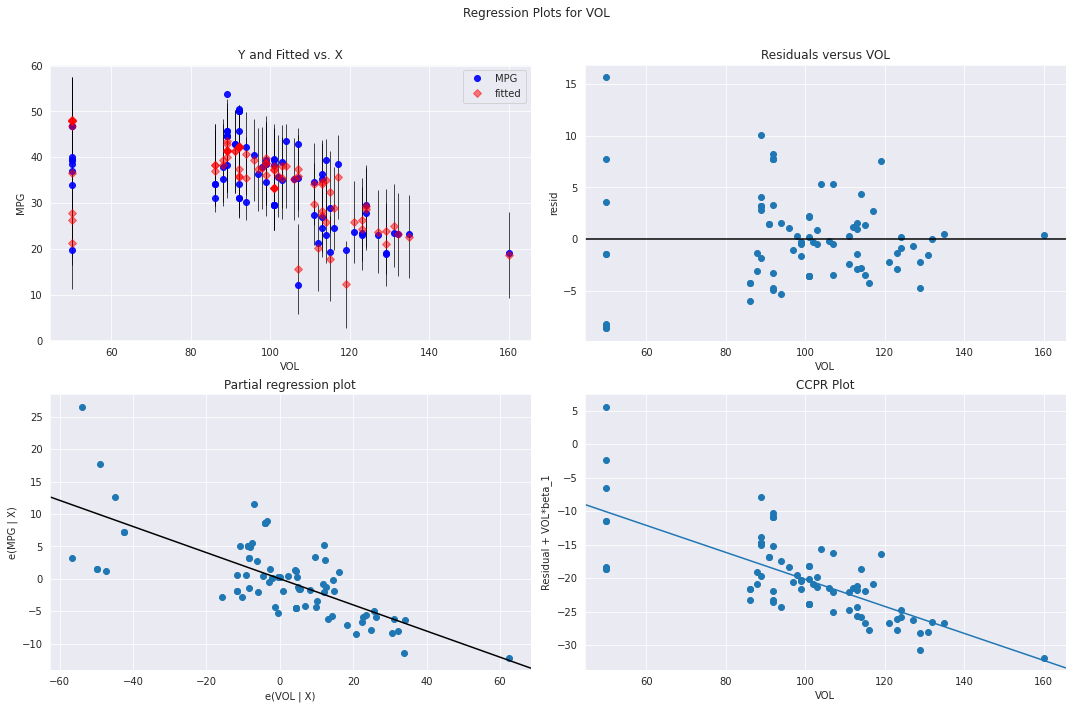

In [48]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

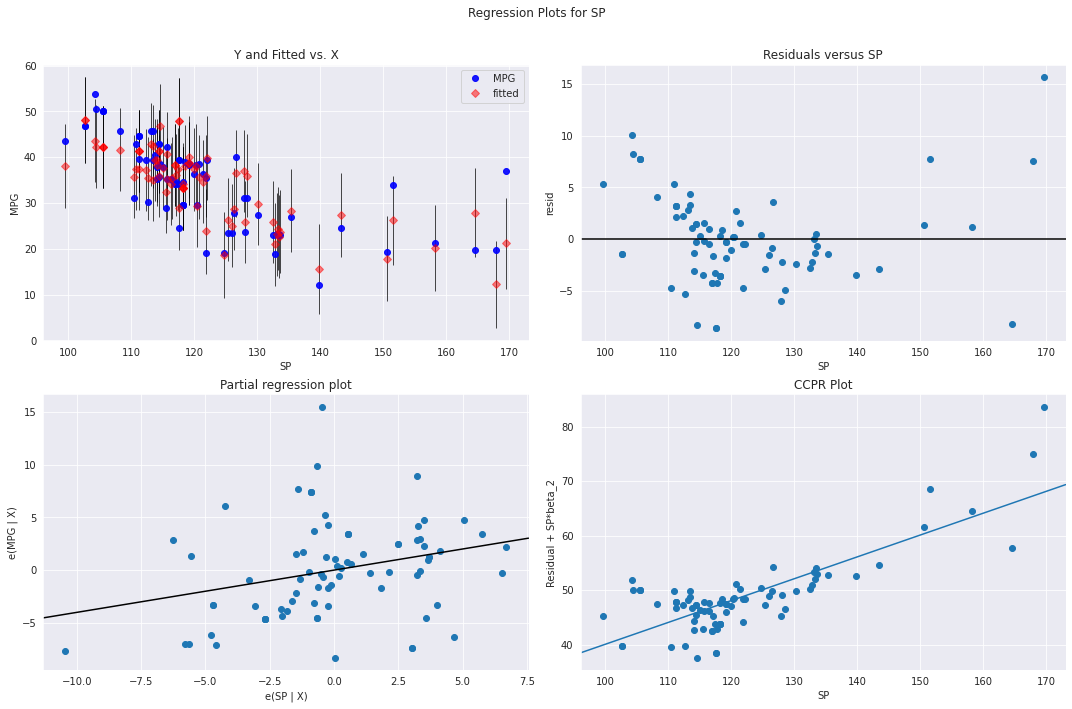

In [49]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

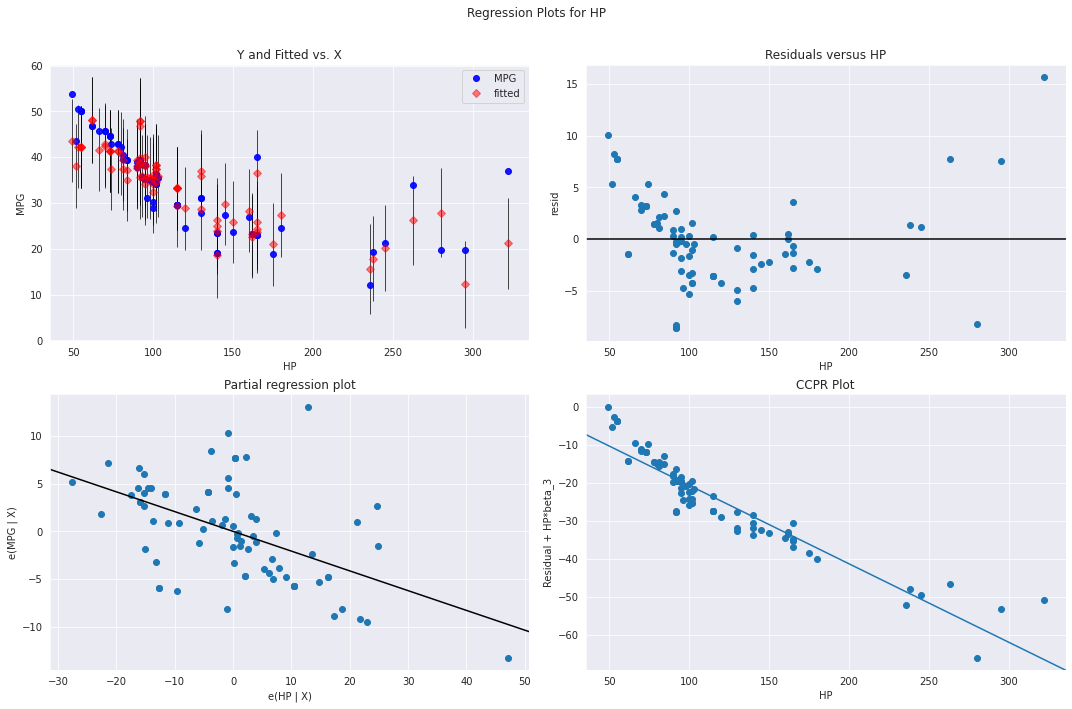

In [50]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

Model Deletion Diagnostics

Detecting outliers/influencer

Cook's Distance

In [51]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence() # this method will return 2 values: cook's distance and p-value.
(c, _) = model_influence.cooks_distance # we don't need p-value so we placed _ here. That is temporary place holder

<ipython-input-52-1bc4447a5696>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(cars)), np.round(c, 3)) # index values of car on x-axis


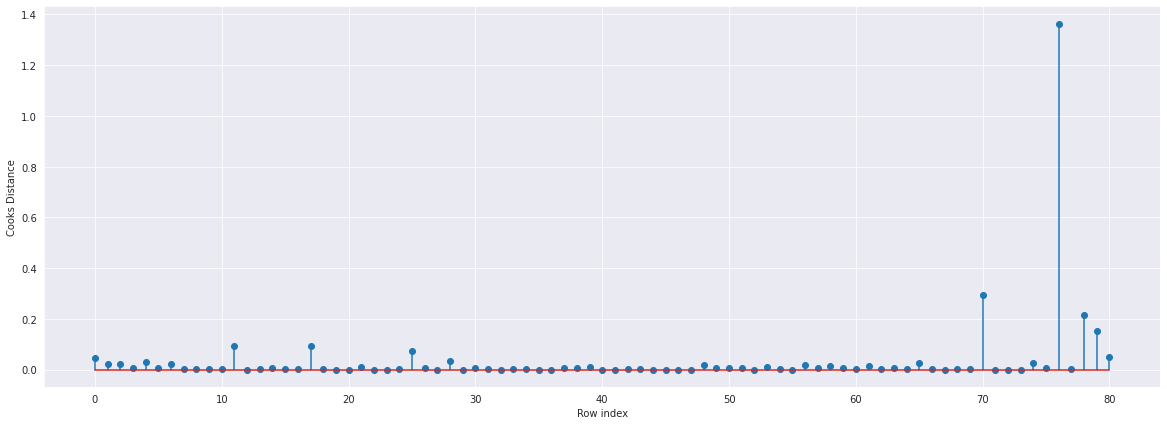

In [52]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3)) # index values of car on x-axis
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
#index and value of influencer where c is more than .
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1.
(np.argmax(c),np.max(c)) # argmax() gives index value of max value in dataset
# 1.3641743869103298 is cook's distance for index 76

(76, 1.3641743869103298)

HIGH Influence points

In [56]:
cars.shape

(81, 5)

In [57]:
k = cars.shape[1] #k is no of variables
n = cars.shape[0] # no of data points
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.2222222222222222

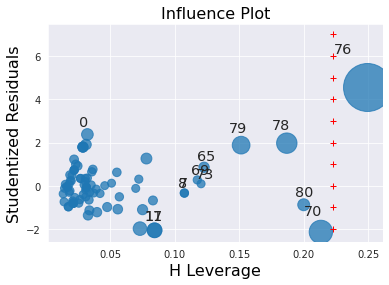

In [58]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]# -2 to 8: 10 values for printing + in red color
x=[leverage_cutoff for i in range(10)] # 10 values for printing + in red color
plt.plot(x,y,'r+')

plt.show()

From above plot ,it is evident that data point 70 & 76 are the influencers

In [59]:
cars[cars.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [60]:
#See the differences in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


Improving the Model

In [61]:
#Load the data
cars_new = pd.read_csv("/content/Cars.csv")

In [62]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [63]:
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [64]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [65]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


Build Model

In [66]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [69]:
final_ml_V.rsquared,final_ml_V.aic

(0.8161692010376006, 446.11722639447726)

In [67]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [68]:
final_ml_W.rsquared,final_ml_W.aic

(0.8160034320495304, 446.1884323575032)

comparing above R-square & AICvalues,model 'final_ml_V'has high R-square & liw AIC value hence low AIC value hence include variable 'VOl' so that multi collinearity problem would be resolved & discard 'WT'

In [70]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance
# find again if any data point has high influence or outlier

<ipython-input-71-e055964ec615>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(car1)),np.round(c_V,3));


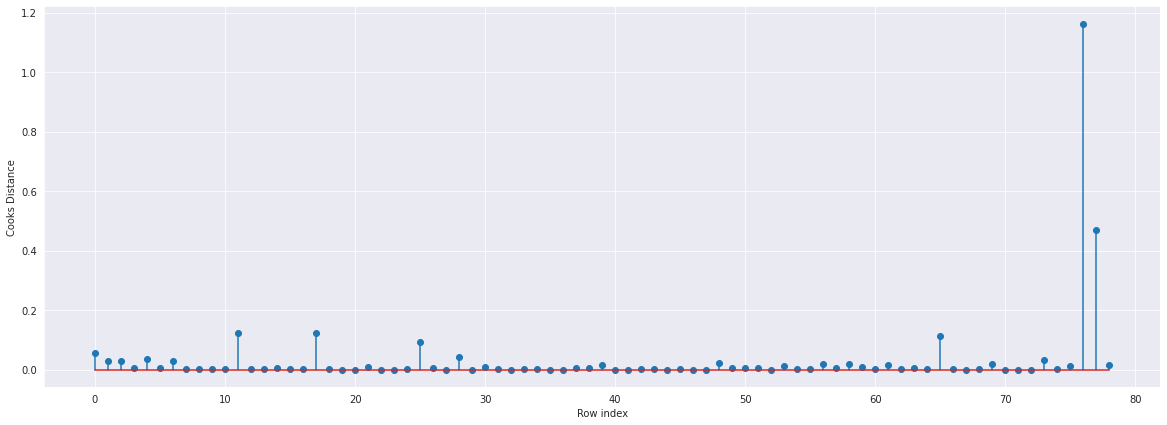

In [71]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [72]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135262)

In [73]:
#Drop 76 and 77 (to be on safer side) observations 
car2=car1.drop(car1.index[[76,77]],axis=0)

In [74]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [75]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [76]:
car4=car3.drop(['index'],axis=1)

In [77]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [78]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [79]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-80-76ad8c62cf84>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(car4)),np.round(c_V,3));


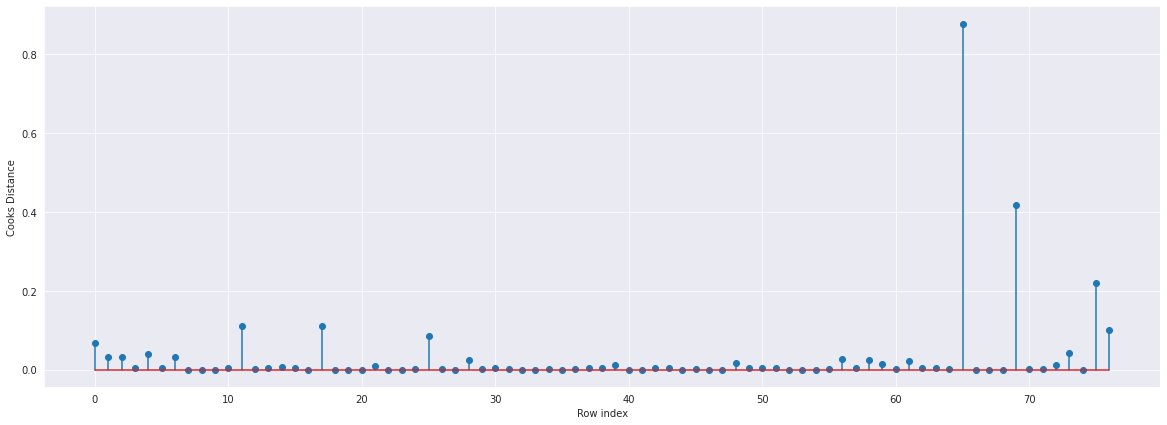

In [80]:
ig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance'); # Here 0.9 did not cross 1 so no need to remove it

In [81]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296681)

Since the value is<1  ,we can stop the diagnostic process & finalize the model

In [82]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [83]:
(final_ml_V.rsquared,final_ml_V.aic) # compare with 1st model values. It was 0.77053 now it is 0.86696 

(0.866963611185906, 409.41530627195095)

Predicting for new data

In [84]:
#New data for prediction - what will be MPG for follow. values?
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=["index 1"])

In [85]:
new_data

,HP,VOL,SP,WT
index 1,40,95,102,35


In [86]:
final_ml_V.predict(new_data)

index 1    46.035594
dtype: float64